In [7]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

In [8]:
# first reproduce energy, spatial spectrum
dirin = "data"
ar39filename = "Ar39_{}Pileup_cut265PE.csv"
muonfilename = "MarginalMuons_wt_{}ar39_cut265PE.csv"

dfar39_list = []
dfmuon_list = []

for i in range(1, 7+1):
    dfar39 = pd.read_csv(os.path.join(dirin, "Ar39", ar39filename.format(i)), index_col=False)
    dfar39_list.append(dfar39)
for i in range(0, 3+1):
    dfmuon = pd.read_csv(os.path.join(dirin, "Muons", muonfilename.format(i)), index_col=False)
    dfmuon_list.append(dfmuon)

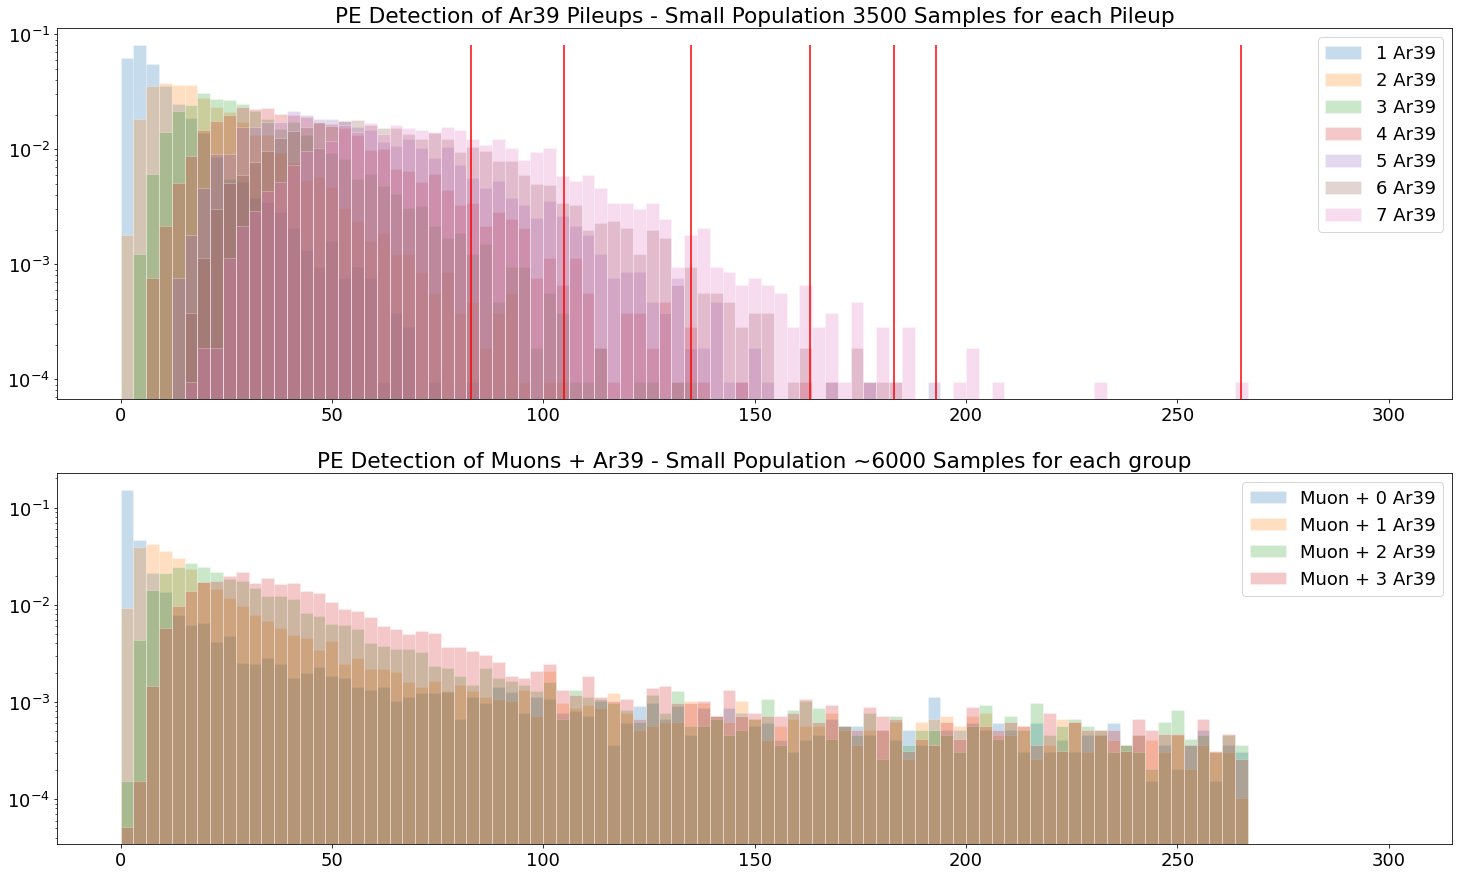

In [20]:
# check energy distribution
bins = np.linspace(0, 300, 100)
alpha=0.25
plt.subplot(2, 1, 1)
for i, df in enumerate(dfar39_list):
    plt.hist(df.pedetected, bins=bins, density=True, alpha=alpha, edgecolor='w', label="{} Ar39".format(i+1))
    plt.vlines(df.pedetected.max(), ymin=0, ymax=0.08, color='r')
plt.yscale('log')
plt.legend()
plt.title("PE Detection of Ar39 Pileups - Small Population 3500 Samples for each Pileup")

plt.subplot(2, 1, 2)
for i, df in enumerate(dfmuon_list):
    plt.hist(df.pedetected, bins=bins, density=True, alpha=alpha, edgecolor='w', label="Muon + {} Ar39".format(i))
plt.yscale('log')
plt.legend()
plt.title("PE Detection of Muons + Ar39 - Small Population ~6000 Samples for each group")
plt.show()

Std Deviation of Active Slices:
1Ar39 Pileup - StdDev: mean: 6.178601153963942, std:5.533278079837326
2Ar39 Pileup - StdDev: mean: 12.829425179747652, std:6.787810720611211
3Ar39 Pileup - StdDev: mean: 15.265637237457925, std:5.82598283227531
4Ar39 Pileup - StdDev: mean: 16.487346949319274, std:4.970900554916004
5Ar39 Pileup - StdDev: mean: 17.51401638180158, std:4.285906020022873
6Ar39 Pileup - StdDev: mean: 18.159815418416706, std:3.878627151669976
7Ar39 Pileup - StdDev: mean: 18.467086996247637, std:3.386413191122714
Muon + 0Ar39 - StdDev: mean: 6.5644627051448685, std:6.960518205578214
Muon + 1Ar39 - StdDev: mean: 12.804286992647809, std:6.532659872558353
Muon + 2Ar39 - StdDev: mean: 15.273494936577046, std:5.830861527367332
Muon + 3Ar39 - StdDev: mean: 16.661100679670948, std:5.127528902974842


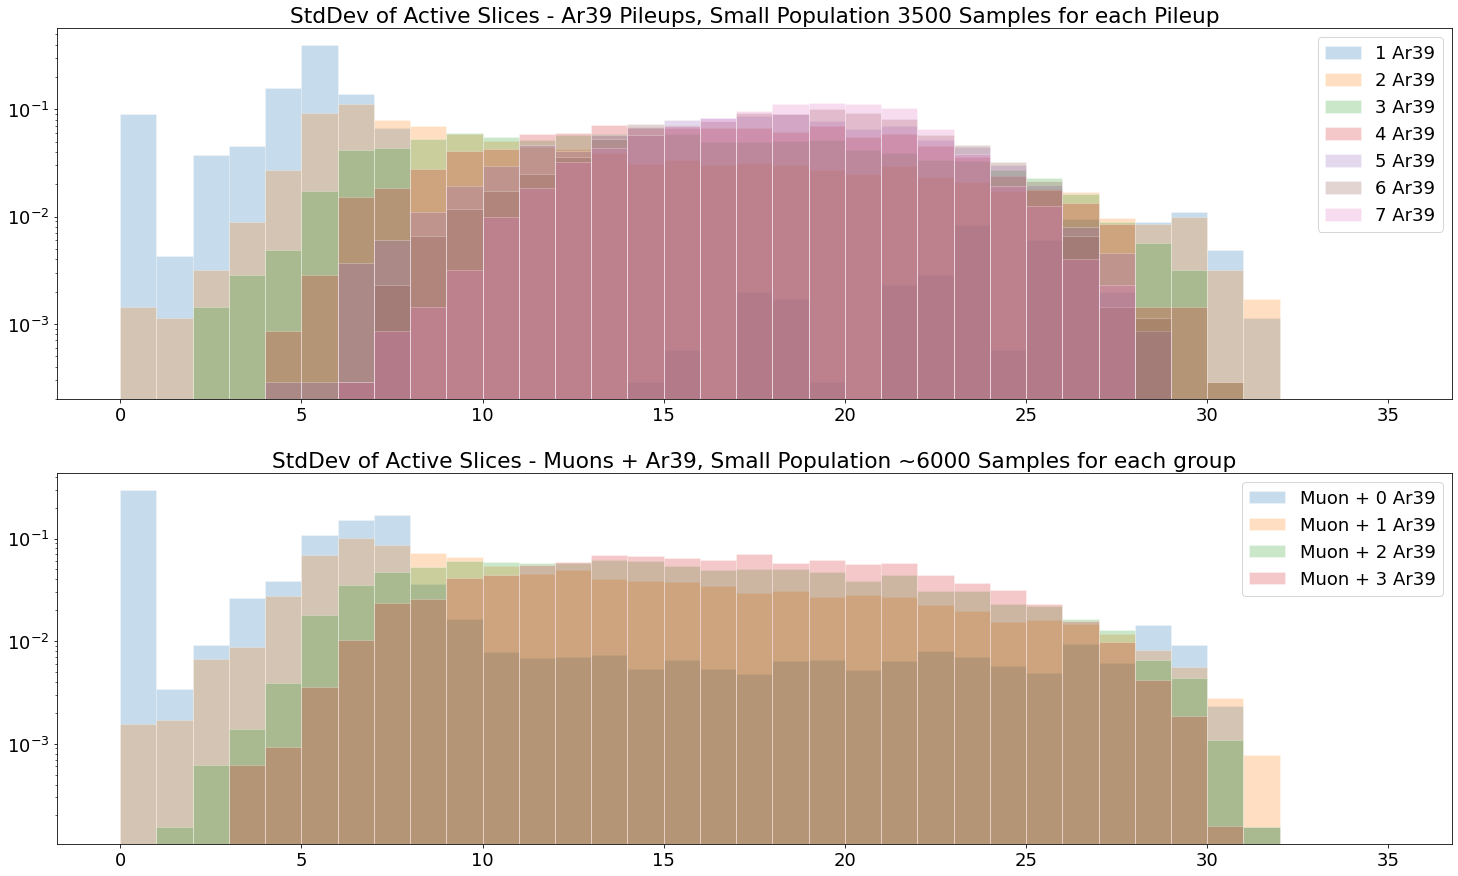

In [24]:
# check energy distribution
bins = np.linspace(0, 35, 36)
alpha=0.25
plt.subplot(2, 1, 1)
print("Std Deviation of Active Slices:")
for i, df in enumerate(dfar39_list):
    stddev = df.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)
    plt.hist(stddev, bins=bins, density=True, alpha=alpha, edgecolor='w', label="{} Ar39".format(i+1))
    print("{}Ar39 Pileup - StdDev: mean: {}, std:{}".format(i+1, stddev.mean(), stddev.std()))
plt.yscale('log')
plt.legend()
plt.title("StdDev of Active Slices - Ar39 Pileups, Small Population 3500 Samples for each Pileup")

plt.subplot(2, 1, 2)
for i, df in enumerate(dfmuon_list):
    stddev = df.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)
    plt.hist(stddev, bins=bins, density=True, alpha=alpha, edgecolor='w', label="Muon + {} Ar39".format(i))
    print("Muon + {}Ar39 - StdDev: mean: {}, std:{}".format(i, stddev.mean(), stddev.std()))
plt.yscale('log')
plt.legend()
plt.title("StdDev of Active Slices - Muons + Ar39, Small Population ~6000 Samples for each group")
plt.show()